<a href="https://colab.research.google.com/drive/1Hs2YYqwXZuz5KodBIj4tItxO1xmdi8sD?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy.random import multivariate_normal
from numpy.random import uniform

In [ ]:
def create_dataset(n_samples=3000):
  """ Create dataset with 2 Gaussian distributions and uniform distribution"""
  n_sample = n_samples//3
  data = np.zeros([n_samples, 3])

  data_0 = multivariate_normal(mean=[-1, 1], cov=[[2, 1],[1, 2]], size=(n_sample))
  data_1 = multivariate_normal(mean=[1, 5], cov=[[3, 1],[2, 1]], size=(n_sample))
  data_2 = uniform([5, -3], [10, 5], size=(n_sample, 2))

  # Merged all datapoints into one dataset
  data[:n_sample, :2] = data_0
  data[:n_sample, 2] = np.asarray([0]*n_sample)
  data[n_sample:2*n_sample, :2] = data_1
  data[n_sample:2*n_sample, 2] = np.asarray([1]*n_sample)
  data[2*n_sample:, :2] = data_2
  data[2*n_sample:, 2] = np.asarray([2]*n_sample)

  return data


def plot_dataset(data):
  """ Plots the generated dataset"""
  data_0 = data[data[:, 2] == 0][:, :2]
  data_1 = data[data[:, 2] == 1][:, :2]
  data_2 = data[data[:, 2] == 2][:, :2]

  plt.scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
  plt.scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
  plt.scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
  plt.legend()
  plt.title("2 ovelapping Gaussian distributions and one uniform distribution")
  plt.show()
  plt.clf()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


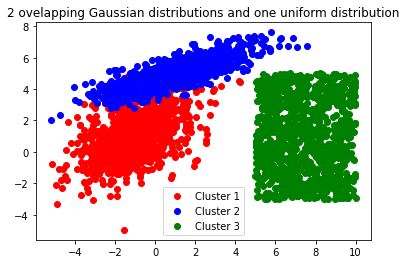

<Figure size 432x288 with 0 Axes>

In [ ]:
data = create_dataset()
plot_dataset(data)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(data[:, :2])
y_gm = gm.fit_predict(data[:, :2])
y_gm_proba = gm.predict_proba(data[:, :2])

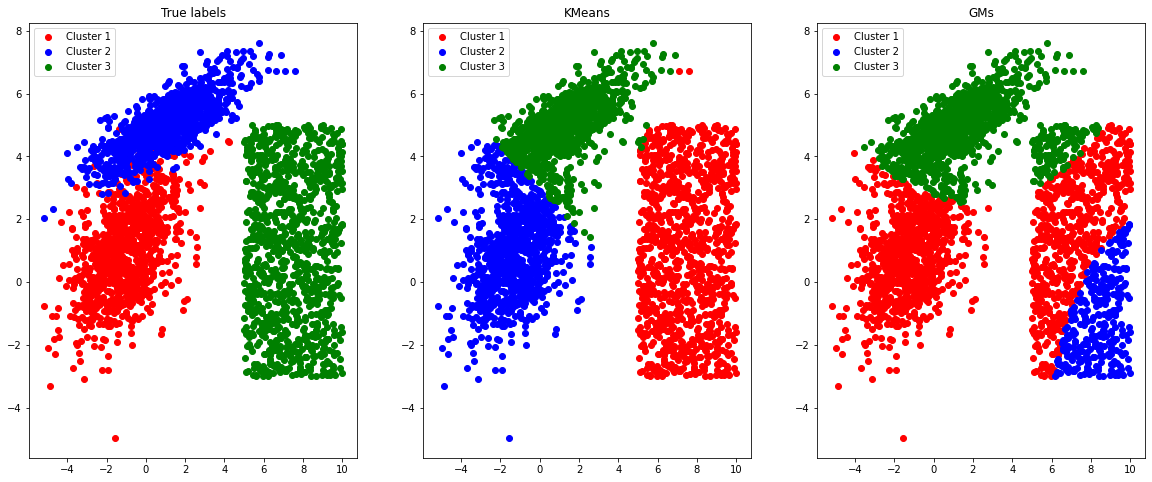

In [ ]:
def plot_results(data, y_kmeans, y_gm):
  """Plot the results in one figure"""
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(20, 8, forward=True)  
  labels = [data[:, 2], y_kmeans, y_gm]
  title = ["True labels", "KMeans", "GMs"]

  for i in range(len(labels)):
    data_0 = data[labels[i] == 0][:, :2]
    data_1 = data[labels[i] == 1][:, :2]
    data_2 = data[labels[i] == 2][:, :2]
    ax[i].scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
    ax[i].scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
    ax[i].scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
    ax[i].set_title(title[i])
    ax[i].legend()
  
  plt.show()

plot_results(data, y_kmeans, y_gm)

In [ ]:
def plot_different_gms(data, threshold, 
                       y_gm, y_gm_proba, 
                       y_gm_kmeans, y_gm_proba_kmeans):
  """ Plots GMs with a random and kmeans initializer"""
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(20, 8, forward=True)

  # Create new label ("unknown") for predictions < probability threshold
  y_gm_proba = np.amax(y_gm_proba, axis=1)
  y_gm[y_gm_proba < threshold] = 3
  
  y_gm_proba_kmeans = np.amax(y_gm_proba_kmeans, axis=1)
  y_gm_kmeans[y_gm_proba_kmeans < threshold] = 3

  labels = [data[:, 2], y_gm, y_gm_kmeans]
  title = ["True labels", 
           "GMs with random initializer", 
           "GMs with KMeans as initialization"]
  
  for i in range(len(labels)):
    data_0 = data[labels[i] == 0][:, :2]
    data_1 = data[labels[i] == 1][:, :2]
    data_2 = data[labels[i] == 2][:, :2]
    ax[i].scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
    ax[i].scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
    ax[i].scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
    
    if i != 0:
      # First data are just true labels for comparison
      data_3 = data[labels[i] == 3][:, :2]
      ax[i].scatter(data_3[:, 0], data_3[:, 1], c='black', label="Unknown Cluster")
    
    ax[i].set_title(title[i])
    ax[i].legend()

  plt.show()

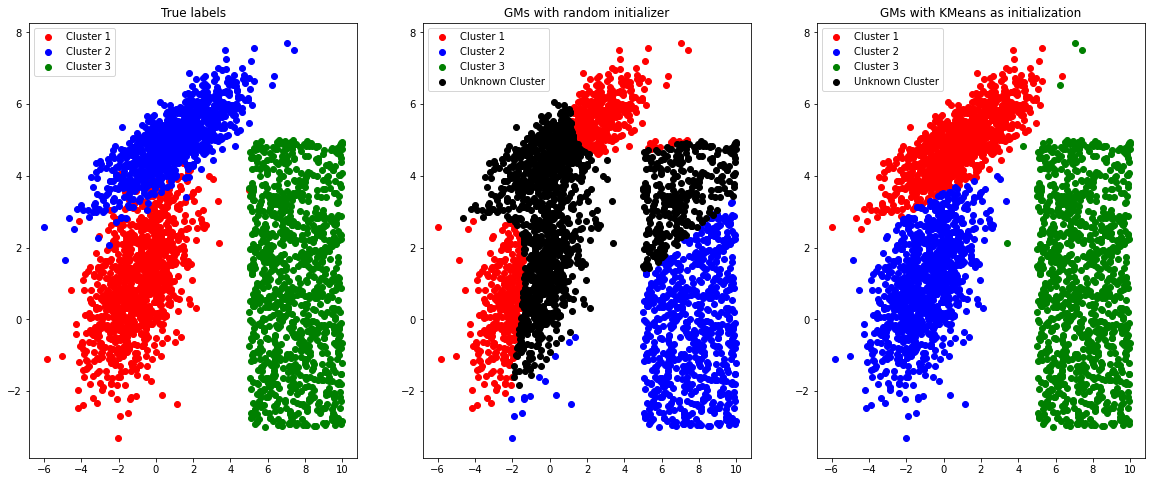

In [ ]:
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
gm_kmeans = GaussianMixture(n_components=3, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')

y_gm = gm.fit_predict(data[:, :2])
y_gm_proba = gm.predict_proba(data[:, :2])

y_gm_kmeans = gm_kmeans.fit_predict(data[:, :2])
y_gm_proba_kmeans = gm_kmeans.predict_proba(data[:, :2])

plot_different_gms(data, 0.34, 
                   y_gm, y_gm_proba, 
                   y_gm_kmeans, y_gm_proba_kmeans)

In [ ]:
# Measuring Computation Time
data_new = create_dataset(12000)
# Dictionary to gather the results
elapsed_time = {
    "k": [],
    "gm": [] ,
    "gm_kmeans": [],
    "kmeans": [] 
}

# Measure time for different number of clusters
for i in range(1, 11):
  kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)
  gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
  gm_kmeans = GaussianMixture(n_components=3, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')
  
  start_kmeans = time.time()
  kmeans.fit_predict(data_new)
  stop_kmeans = time.time()

  gm.fit_predict(data_new)
  start_gm = time.time()
  stop_gm = time.time()
  
  start_gm_kmeans = time.time()
  gm_kmeans.fit_predict(data_new)
  stop_gm_kmeans = time.time()

  elapsed_time["k"].append(i)
  elapsed_time["kmeans"].append(stop_kmeans-start_kmeans)
  elapsed_time["gm"].append(stop_gm-start_gm)
  elapsed_time["gm_kmeans"].append(stop_gm_kmeans-start_gm_kmeans)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


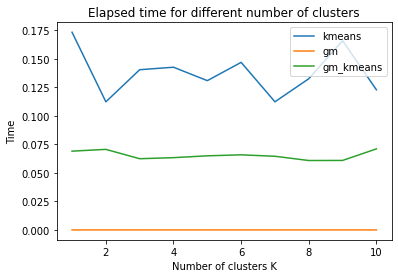

In [ ]:
# Plotting the results from the dictionary
plt.plot(elapsed_time["k"], elapsed_time["kmeans"], label="kmeans")
plt.plot(elapsed_time["k"], elapsed_time["gm"], label="gm")
plt.plot(elapsed_time["k"], elapsed_time["gm_kmeans"], label="gm_kmeans")
plt.legend()
plt.title("Elapsed time for different number of clusters")
plt.xlabel("Number of clusters K")
plt.ylabel("Time")
plt.show()